# Loan Data -- Explore and Clean

In [112]:
import pandas as pd
import numpy as np

In [113]:
# Quick sorting of the original CSV file showed a variety of values used to signify missing. 
# These are now changed to np.nan on loading. 

In [114]:
missing_values = ['n/a','na', 'NaN','#VALUE!']
df=pd.read_csv('data/LoanData.csv',na_values=missing_values, low_memory=False)
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056.0,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149.0,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335.0,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915.0,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081.0,0.0,0.0


In [116]:
df.shape

(256984, 19)

In [117]:
df.drop_duplicates();

In [118]:
df.shape # no duplicates are removed

(256984, 19)

In [119]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                     object
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [120]:
# object columns: Loan Status, Term, Years in current job, Home ownership, Purpoose, Monthly Debt
# Monthly debt can be changed to float

In [121]:
df['Monthly Debt']=df['Monthly Debt'].str.replace('$', '', n=1)
df['Monthly Debt']=df['Monthly Debt'].str.replace(',', '', n=1)
df['Monthly Debt']=pd.to_numeric(df['Monthly Debt'], downcast='float')

<ipython-input-121-33437b23b6b7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Monthly Debt']=df['Monthly Debt'].str.replace('$', '', n=1)


In [122]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,2.569800e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,963.312256,18.290195,34.881450,11.106267,0.156628,1.540656e+04,3.572350e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,634.099243,7.075747,21.854165,4.982982,0.460731,1.966506e+04,5.550080e+05,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,0.000000,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,531.992493,13.500000,16.000000,8.000000,0.000000,5.974000e+03,1.277800e+04,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,844.520020,17.000000,32.000000,10.000000,0.000000,1.107800e+04,2.174000e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,1252.452454,21.700000,51.000000,14.000000,0.000000,1.931900e+04,3.617125e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,22939.119141,70.500000,176.000000,76.000000,11.000000,1.731412e+06,1.763322e+08,7.000000,11.000000


In [123]:
# maximum records = 2.56984e+05, 'Credit Score', 'Annual Income', 
#'Months since last delinquent', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens' -- all have missing data

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

<Figure size 432x288 with 0 Axes>

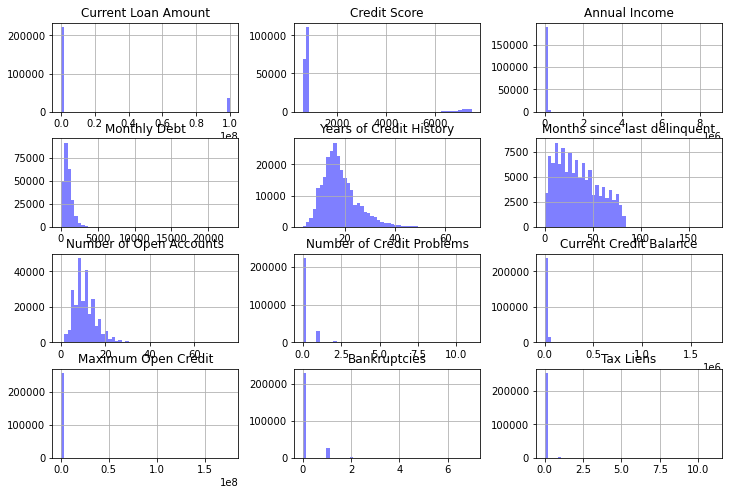

In [125]:
plt.figure();
df.hist(color="b", alpha=0.5, bins=50, figsize=(12, 8));

In [126]:
# 'Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 
#'Bankruptcies' and 'Tax Liens' are stronly skewd right
# on inspection, the maximum values here are orders of magnitude higher than the 75%

In [127]:
df[df['Current Loan Amount'] > 0.8e8]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,99999999,Short Term,742.0,3 years,Home Mortgage,64760.0,Debt Consolidation,582.840027,26.8,NaN,11,0,8880,22711.0,0.0,0.0
16,0002c691-5314-44ab-b205-3fb1cc4ee6b2,41207d1e-5d13-43ec-9fe9-f222b4da5e0c,Fully Paid,99999999,Short Term,744.0,6 years,Home Mortgage,65605.0,Debt Consolidation,984.070007,21.0,NaN,5,1,11514,17262.0,1.0,0.0
23,0003fbfd-33ee-4ae9-8074-b46f6ff59281,c14bbc84-5041-4e70-bd64-3db51f7e80ae,Fully Paid,99999999,Short Term,745.0,10+ years,Rent,39476.0,other,483.579987,15.4,79.0,12,0,4636,21171.0,0.0,0.0
28,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,Fully Paid,99999999,Short Term,724.0,1 year,Own Home,34297.0,Home Improvements,777.380005,13.6,2.0,12,0,6720,53335.0,0.0,0.0
42,0008cacc-1ea9-4599-b114-12709b13c85d,cd853967-4535-4d36-bf93-269504c74911,Fully Paid,99999999,Short Term,750.0,10+ years,Own Home,86785.0,Other,56.410000,22.0,NaN,7,0,3959,63862.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256938,fff2ae68-b9ca-4fb2-a53e-32684915bc6e,3a9268d1-a96b-4e7c-a022-8deea10d0b12,Fully Paid,99999999,Short Term,663.0,8 years,Home Mortgage,108482.0,Home Improvements,1365.069946,20.3,NaN,13,0,17264,23174.0,0.0,0.0
256953,fff72330-5397-4cbd-ad39-4d54bbc0dca9,a901d714-eaa1-4b31-b385-c51c0fa6eabd,Fully Paid,99999999,Short Term,698.0,7 years,Rent,65941.0,Debt Consolidation,1364.969971,21.5,NaN,16,0,19104,23556.0,0.0,0.0
256954,fff72f03-243b-422c-ab33-cb15e80e4c0d,f5cf8f78-6b65-4805-9b61-46086c441b08,Fully Paid,99999999,Short Term,742.0,10+ years,Rent,118128.0,Debt Consolidation,2608.659912,17.0,NaN,17,0,35089,55520.0,0.0,0.0
256963,fffb62c8-6149-4746-8b10-e1d2363f3b31,30e19db5-7ffe-4375-a253-f86dc565dfe8,Fully Paid,99999999,Short Term,738.0,10+ years,Rent,34749.0,Debt Consolidation,833.979980,11.0,25.0,17,0,3146,16050.0,0.0,0.0


In [128]:
# the size of the Current Loan Amount = 99999999 may be indicate a short-term loan of 100 MLN 
# but is more likely to indicate a missing value

In [129]:
df['Current Loan Amount']=df['Current Loan Amount'].replace(99999999, np.nan)

In [130]:
df[df['Current Loan Amount']> 0.8e8]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


<Figure size 432x288 with 0 Axes>

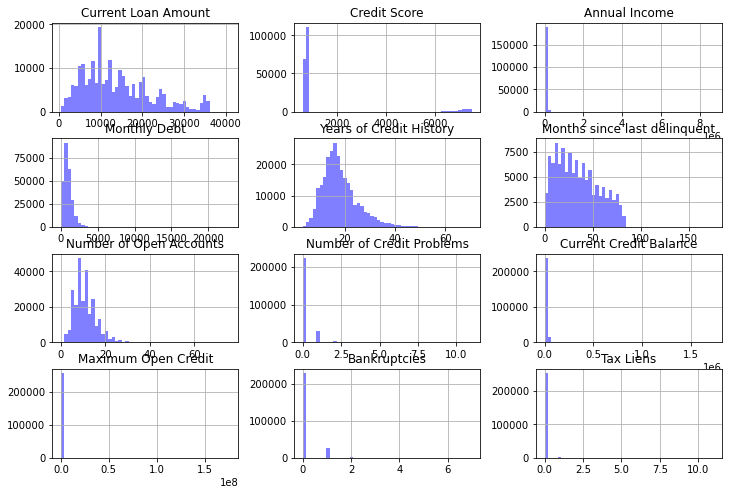

In [131]:
plt.figure();
df.hist(color="b", alpha=0.5, bins=50, figsize=(12, 8));

In [132]:
df[df['Credit Score'] > 6000]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613.0,Long Term,6640.0,6 years,Rent,49225.0,Business Loan,542.289978,17.6,73.0,7,0,14123,16954.0,0.0,0.0
55,000c0c27-1961-4336-b760-a300e1bce9b0,881edf98-387c-4eef-ab71-317a7a5e70c1,Charged Off,6463.0,Short Term,7320.0,1 year,Own Home,25248.0,Debt Consolidation,633.289978,19.9,74.0,9,0,8025,24317.0,0.0,0.0
71,000f1140-ef9f-42f9-9898-f9b3162bf0da,442c2d9b-3d95-44a9-bcb4-0dc80a941e3c,Charged Off,6007.0,Short Term,7180.0,10+ years,Home Mortgage,43052.0,Debt Consolidation,538.150024,23.6,13.0,6,0,5077,7811.0,0.0,0.0
73,000f5c35-dc3e-415f-9c22-e355ef96d78b,0ecf29b6-93eb-4c13-b853-a9cbdfc7f85b,Charged Off,12899.0,Long Term,6670.0,2 years,Rent,133947.0,Debt Consolidation,1931.069946,18.4,7.0,16,0,39417,90199.0,0.0,0.0
79,001227a1-4490-47c6-ada7-20faf636e9a3,3d4a8985-0b72-4084-8b20-f441d9868483,Charged Off,5060.0,Short Term,7270.0,< 1 year,Home Mortgage,62738.0,Other,711.030029,20.4,22.0,6,0,10777,12041.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256946,fff5f918-967f-4cae-b8e8-0ec41b9d0a69,92093f79-1142-496c-8aef-0bc152ed8dd9,Charged Off,20658.0,Short Term,7450.0,10+ years,Rent,45963.0,Debt Consolidation,792.859985,17.4,NaN,10,0,13192,36143.0,0.0,0.0
256948,fff61503-051a-4bb8-8342-287939fa738a,b36620f7-d086-45c4-bfdc-b14c2187d0c6,Charged Off,20492.0,Short Term,7220.0,5 years,Rent,52511.0,Debt Consolidation,1163.989990,19.0,NaN,12,0,18732,24391.0,0.0,0.0
256952,fff6748f-e442-4848-9dd6-2252cb7396fd,6a54a6c9-3328-4ee0-bcb9-f4e8af37ff12,Charged Off,12262.0,Long Term,7410.0,NaN,Home Mortgage,40872.0,Debt Consolidation,705.039978,16.5,NaN,11,0,13892,22775.0,0.0,0.0
256977,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,Charged Off,11953.0,Short Term,7170.0,10+ years,Home Mortgage,39844.0,Debt Consolidation,982.820007,11.7,NaN,9,1,4176,4783.0,1.0,0.0


In [133]:
# it is not clear why credit score is so high for more than 16 000 individuals
# leave this one untouched

In [134]:
df[df['Annual Income'] > 2e6]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
34065,21ea699e-4eea-4908-9d67-7ae36f31d221,4e0d2d18-db25-40f6-ab3a-7746cd676d2e,Fully Paid,NaN,Short Term,746.0,10+ years,Home Mortgage,5879400.0,Home Improvements,783.919983,14.9,40.0,4,0,8917,9308.0,0.0,0.0
39791,2790a78c-3405-4403-b9fa-c46dcb296c02,824b8012-5314-453d-aa28-b9ee9e4bfded,Fully Paid,NaN,Short Term,735.0,7 years,Home Mortgage,2267570.0,Home Improvements,4516.240234,16.4,NaN,8,0,40925,42017.0,0.0,0.0
110725,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,8006.0,Short Term,725.0,10+ years,Home Mortgage,8713547.0,Debt Consolidation,798.739990,16.0,NaN,11,0,16462,30429.0,0.0,0.0
110726,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,8006.0,Short Term,725.0,10+ years,Home Mortgage,8713547.0,Debt Consolidation,798.739990,16.0,NaN,11,0,16462,30429.0,0.0,0.0
169514,a88c6d42-44b3-4a29-afdf-84e31a4ce246,419bfdfe-66fa-4e7e-a568-e4e090c39796,Fully Paid,9899.0,Short Term,748.0,3 years,Home Mortgage,7523240.0,Home Improvements,564.239990,27.4,21.0,18,0,2469,15725.0,0.0,0.0


In [135]:
# Annual income looks possible
# records 110725 amd 110726 are identical
df.drop(110726,inplace=True);

In [136]:
df[df['Annual Income'] > 2e6]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
34065,21ea699e-4eea-4908-9d67-7ae36f31d221,4e0d2d18-db25-40f6-ab3a-7746cd676d2e,Fully Paid,NaN,Short Term,746.0,10+ years,Home Mortgage,5879400.0,Home Improvements,783.919983,14.9,40.0,4,0,8917,9308.0,0.0,0.0
39791,2790a78c-3405-4403-b9fa-c46dcb296c02,824b8012-5314-453d-aa28-b9ee9e4bfded,Fully Paid,NaN,Short Term,735.0,7 years,Home Mortgage,2267570.0,Home Improvements,4516.240234,16.4,NaN,8,0,40925,42017.0,0.0,0.0
110725,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,8006.0,Short Term,725.0,10+ years,Home Mortgage,8713547.0,Debt Consolidation,798.739990,16.0,NaN,11,0,16462,30429.0,0.0,0.0
169514,a88c6d42-44b3-4a29-afdf-84e31a4ce246,419bfdfe-66fa-4e7e-a568-e4e090c39796,Fully Paid,9899.0,Short Term,748.0,3 years,Home Mortgage,7523240.0,Home Improvements,564.239990,27.4,21.0,18,0,2469,15725.0,0.0,0.0


In [148]:
df[df['Current Credit Balance'] > 1e6]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
64449,401c650d-daa0-41dd-ab52-9a5926f70715,255619a3-96ca-4521-95ed-37f2bc4d2791,Fully Paid,34762.0,Short Term,NaN,10+ years,Home Mortgage,NaN,Debt Consolidation,11090.740234,32.0,NaN,28,0,1731412,5869192.0,0.0,0.0
194645,c194cb68-1c4d-4bba-8433-98cf4e0f357d,3e4ec65d-94de-4309-afaa-d5f5055c4053,Charged Off,34675.0,Short Term,7320.0,10+ years,Home Mortgage,396280.0,other,10831.650391,32.5,NaN,28,0,1730472,4483087.0,0.0,0.0
194646,c194cb68-1c4d-4bba-8433-98cf4e0f357d,3e4ec65d-94de-4309-afaa-d5f5055c4053,Charged Off,34675.0,Short Term,NaN,10+ years,Home Mortgage,NaN,other,10831.650391,32.5,NaN,28,0,1730472,4483087.0,0.0,0.0


In [139]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount              35210
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140382
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  4
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [ ]:
# remove 'Months since last delinquent', as well as Loan ID and Customer ID columns

In [141]:
df_new=df.drop(['Loan ID', 'Customer ID', 'Months since last delinquent'], axis=1)

In [143]:
# remove alll rows with NaN

In [144]:
df_new=df_new.dropna(axis=0)

In [145]:
df_new.shape

(152331, 16)

<Figure size 432x288 with 0 Axes>

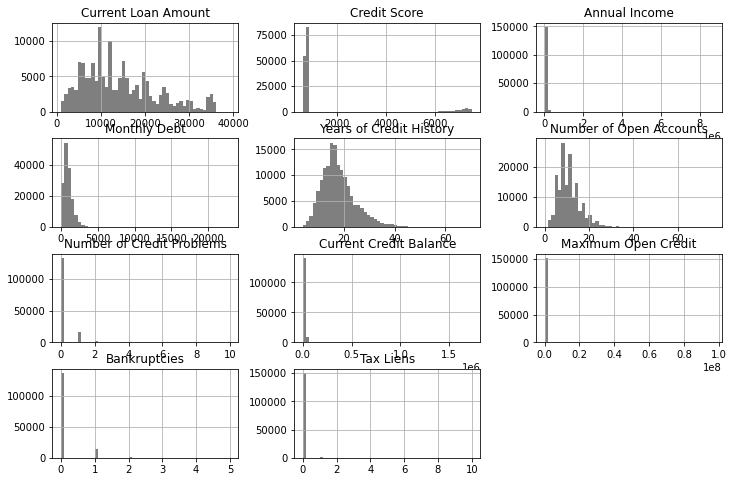

In [147]:
plt.figure();
df_new.hist(color="k", alpha=0.5, bins=50, figsize=(12, 8));

In [150]:
len(df_new[df_new['Credit Score'] > 6000]) # these will stay in

15153

In [152]:
len(df_new[df_new['Annual Income'] > 1e6]) # these can be removed

17

In [156]:
df_new[df_new['Annual Income'] > 1e6].index

Int64Index([ 20887,  41478,  59207,  70592,  81435,  93584, 110725, 123811,
            144081, 169514, 171828, 179983, 184044, 198369, 204833, 204834,
            206759],
           dtype='int64')

In [161]:
df_new.drop(df_new[df_new['Annual Income'] > 1e6].index, inplace = True)

In [153]:
len(df_new[df_new['Current Credit Balance'] > 1e6]) # these can be removed

1

In [158]:
df_new[df_new['Current Credit Balance'] > 1e6].index

Int64Index([194645], dtype='int64')

In [162]:
df_new.drop(df_new[df_new['Current Credit Balance'] > 1e6].index, inplace = True)

In [155]:
len(df_new[df_new['Maximum Open Credit'] > 0.2e8]) # these can be removed

6

In [159]:
df_new[df_new['Maximum Open Credit'] > 0.2e8].index

Int64Index([65497, 118747, 118748, 152015, 241241, 252920], dtype='int64')

In [163]:
df_new.drop(df_new[df_new['Maximum Open Credit'] > 0.2e8].index, inplace = True)

In [164]:
df_new.shape

(152307, 16)

<Figure size 432x288 with 0 Axes>

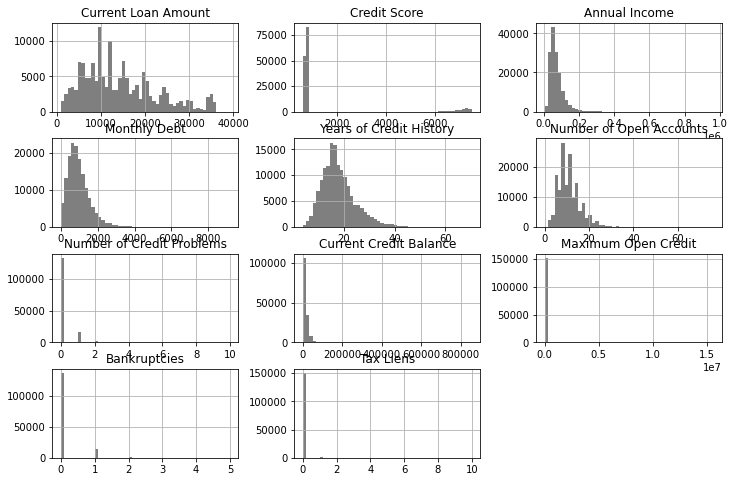

In [165]:
plt.figure();
df_new.hist(color="k", alpha=0.5, bins=50, figsize=(12, 8));

In [166]:
df_new[df_new['Maximum Open Credit'] > 0.2e7].index

Int64Index([  2996,   6254,  10485,  32518,  36013,  36705,  41926,  44825,
             49606,  55044,  57418,  59887,  77126,  77127,  78506,  80008,
             81490,  92674,  93988,  96462,  97720, 103067, 106310, 109798,
            112767, 142231, 144975, 147519, 148418, 149646, 159079, 166387,
            170528, 170550, 174296, 179078, 181979, 186238, 188933, 191256,
            199187, 199488, 208855, 215152, 218131, 219122, 219926, 225995,
            225996, 227883, 228312, 228313, 231225, 240984, 252072, 254584],
           dtype='int64')

In [170]:
# the rest of data stays as is

In [169]:
for i in range(len(df_new.index)) :
    if df_new.iloc[i].isnull().sum()>=1:
        print("NaN in row ", i , " : " ,  df_new.iloc[i].isnull().sum())

In [171]:
# there is no NaN left
# export result to a csv file:
df_new.to_csv('project/df_new.csv', index=False)